# Assignment for "Programming in Data Analysis" module
## Autumn 2021

## An overview of numpy.random 

![NumPy_logo](Images/NumPy_logo.png)

Numpy.random is a module within the bigger NumPy package which allows us to call pseudo-random numbers and gives us a range of tools to implement them. Although there already is a random module in the Python standard library, numpy.random adds much extra functionality in particular in relation to arrays and has the ability to draw from a lot more statistical distributions.

> "NumPy ... is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays."
https://en.wikipedia.org/wiki/NumPy

> "NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more."
https://numpy.org/doc/stable/user/whatisnumpy.html



https://pythonguides.com/python-numpy-random/

https://realpython.com/python-random/#prngs-for-arrays-numpyrandom

https://www.w3schools.com/python/numpy/numpy_random.asp

link to documentation - https://numpy.org/doc/stable/reference/random/index.html

### Simple random data

The numpy.random module has been updated recently so I will mostly be concentrating on the newer version and methods. All of the older methods are still supported though, and I may be using some of them to demonstrate some aspects of the module. We begin by importing all of the necessary libraries.

Generators - https://numpy.org/doc/stable/reference/random/generator.html

In [32]:
# importing the numpy module as np as per convention and economy of space
import numpy as np

# for plotting and visualisations
import matplotlib.pyplot as plt

Numpy creates random number through the use of a BitGenerator and a Generator - the BitGenerator generates random sequences of bits which are transformed into numbers by the generator.

https://numpy.org/doc/stable/reference/random/index.html#random-quick-start

We begin by creating a new constructor using default_rng to get a new generator.

In [37]:
rng = np.random.default_rng(0)
rng

Generator(PCG64) at 0x7FE45812E580

**numpy.random.default_rng.random** returns floating point numbers. If no value is passed we get one randomly generated float. If one value is passed we get an array of that length, and if a second value is passed (with extra brackets) we get a 2D array with those parameters.

In [45]:
# returns a single float
x = rng.random()
print(x)
# returns an array of 3 floats
y = rng.random(3)
print(y)
# returns an array of 3x3 floats
z = rng.random((3,3))
print(z)

0.7111428779897498
[0.93205969 0.11493263 0.72901512]
[[0.92742393 0.96792619 0.0147063 ]
 [0.86364009 0.98119504 0.95721018]
 [0.14876401 0.97262881 0.88993556]]


**numpy.random.default_rng.integers** returns integers. If we pass 1 value, that will be the upper limit and non inclusive. 0 id the default lower limit. If we pass 2 values, the first will be the lower limit and the 2nd the upper. 3 values, and the third will be the amount of numbers creating an array.

In [52]:
# returns an integer between 0-9
x = rng.integers(10)
print(x)
y = rng.integers(3,10)
print(y)
# returns an array of 20 numbers between 2-9
z = rng.integers(2,10,20)
print(z)

2
8
[4 7 6 9 6 9 9 7 7 8 9 3 6 3 2 7 2 7 8 3]


For all of the above code, if we rerun it we will get different results each times. If we want reproducible results we need to pass in a **seed**. We will look at this in more detail later.

#### Choice

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice

**numpy.random.default_rng.choice** generates a random sample from a given array.

In [57]:
# choose 7 numbers at random from the range 0-39
rng.choice(40, 7)

array([23, 29,  7, 31, 21, 30, 20])

#### Bytes
We can also return random bytes.

In [60]:
# returns 10 random bytes!
rng.bytes(10)

b'\xa9\x98`\xfb\xb2l,\ti\xfb'

#### Permutations
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation

In [ ]:
# creates a permutation of the numbers 0-9
print(rng.permutation(10))
# creates 12 numbers and shapes them into 3x4. Then permuted!
arr = np.arange(12).reshape((3, 4))
rng.permutation(arr, axis=1)

#### Shuffle
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle

In [ ]:
# this shuffles something in place already, so the numbers are only shuffled within their list, and each list is shuffled.
# Whereas with permutation above an entire new array is created
arr = np.arange(12).reshape((3, 4))
rng.shuffle(arr)
arr

Link to documentation - https://numpy.org/doc/1.16/reference/routines.random.html <br>
Might be old! <br>
new stuff here - https://numpy.org/doc/stable/reference/random/index.html?highlight=random%20sampling%20numpy%20random#module-numpy.random

### Simple Random Data

- rand - Random values in a given shape.
- randn - Return a sample (or samples) from the “standard normal” distribution.
- randint - Return random integers from low (inclusive) to high (exclusive).
- random_integers - Random integers of type np.int between low and high, inclusive.
- random_sample - Return random floats in the half-open interval [0.0, 1.0).
- random - Return random floats in the half-open interval [0.0, 1.0).
- ranf - Return random floats in the half-open interval [0.0, 1.0).
- sample - Return random floats in the half-open interval [0.0, 1.0).
- choice - Generates a random sample from a given 1-D array
- bytes - Return random bytes

### Permutations

- shuffle - Modify a sequence in-place by shuffling its contents
- permutation - Randomly permute a sequence, or return a permuted range

## Distributions

### Uniform Distribution

In [65]:
# Creating a default figure size
plt.rcParams['figure.figsize']=[12,8]

The higher the size of numbers generated, the more uniforim the distribution

In [66]:
# looking at the difference the 'size' makes
x = rng.integers(100, size = 10)
y = rng.integers(100, size = 100)
z = rng.integers(100, size = 1000)
a = rng.integers(100, size = 10000)
b = rng.integers(100, size = 100000)
c = rng.integers(100, size = 1000000)

We can see this more clearly on a subplot of histograms

(array([ 99820., 100291.,  99961.,  99758., 100077., 100104.,  99657.,
         99806., 100029., 100497.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

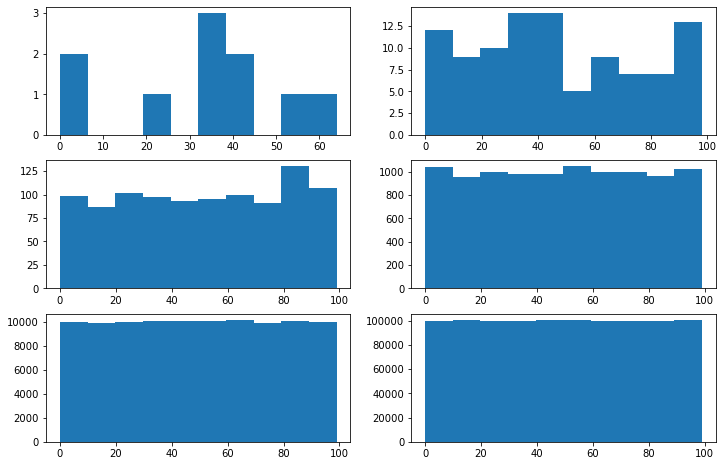

In [67]:
# plt.subplots(3,2) creates 3 rows and 2 columns of plots
# axs[0,0] etc. specifies where this plot goes in the arrangement
fig, axs = plt.subplots(3,2)
axs[0,0].hist(x)
axs[0,1].hist(y)
axs[1,0].hist(z)
axs[1,1].hist(a)
axs[2,0].hist(b)
axs[2,1].hist(c)

This is known as uniform distribution

Link to documentation - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform

Another example below, this time specifying a lower minus value. As above if no lower value is set then zero is the default.

In [ ]:
# range is -1 to 0, and we're getting 1000 numbers
np.random.uniform(-1,0,1000)
# every number is equally likely to be returned

In [ ]:
# visualise
y = np.random.uniform(-1,0,1000)
count, bins, ignored = plt.hist(y, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r') # include a red line to show the average
plt.show()

In [ ]:
# the more times we run it the flatter the line at the top
x = np.random.uniform(-1,0,100000)

count, bins, ignored = plt.hist(x, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

## Normal distribution

Normal distribution represents the behavior of most of the situations in the universe (That is why it’s called a “normal” distribution. I guess!). The large sum of (small) random variables often turns out to be normally distributed, contributing to its widespread application.

Link to documentation - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal

In [61]:
x = rng.standard_normal(10)
x

array([-0.05060406, -0.28312507,  1.64325161, -1.28264924, -0.5856578 ,
       -0.47258768,  0.58633728, -0.6635352 , -0.61341785, -1.6051494 ])

In [ ]:
# (10,100,10000) 1st number is centre, 2nd is spread (*3), 3rd of amount of
# numbers returned
z=np.random.normal(10,100,10000)

In [ ]:
plt.hist(z)

## Binomial Distribution

Binomial distribution is when we're dealing with only 2 outcomes. These can be equal such as a coin toss as demomstrated below. Or if we know the probability of an outcome we can insert that as in the second example.

Link to documentation - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

#### coin toss

In [ ]:
>>> n, p = 10, .5  # n= number of trials, p = probability of each trial
>>> s = np.random.binomial(n, p, 1000)
# s = result of flipping a coin 10 times (either heads/tails), tested 1000 times.
s

In [ ]:
# Plotted
plt.hist(s)

A real world example. A company drills 9 wild-cat oil exploration wells, each with an estimated probability of success of 0.1. All nine wells fail. What is the probability of that happening?

Let’s do 20,000 trials of the model, and count the number that generate zero positive results.

In [ ]:
sum(np.random.binomial(9, 0.1, 20000) == 0)/20000.

In [ ]:
# to visualise that
a = np.random.binomial(9, 0.1, 20000)
plt.hist(a)

## Poisson Distribution

Not quite sure what this is about! :)

Link to documentation - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson

In [ ]:
rng = np.random.default_rng()
s = rng.poisson(5, 10000)
plt.hist(s)

## Exponential Distribution

Link to documentation - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential

In [ ]:
gfg = np.random.exponential(3.45, 10000)
  
count, bins, ignored = plt.hist(gfg, 14, density = True)
plt.show()

The following is a basic introduction as to how it works

In [31]:
# creates a variable which is a random integer between 0 and 4 with 4 being non-inclusive
result = np.random.randint(4)

result

1

If we want to create a random float we use rand

In [ ]:
# creates a random floating point number
result = np.random.rand(4)

result

In [ ]:
# we can then add more parameters
# this an array comprising a list 3 lists each containing 4 floats
result = np.random.rand(3,4)

result

In [ ]:
# creates a variable which is an array of 5 random integers between 0 and 4
result = np.random.randint(1, 4, size=5)

result

In [ ]:
# seed random number generator
np.random.seed(1)
# generate some random numbers
x= np.random.rand(3)
# # reset the seed
np.random.seed(1)
# # generate some random numbers
x

In [ ]:
# Creates an array of 10 floats from the standard/normal/Gaussian distribution
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
result = np.random.randn(10)

result

In [ ]:
# creates a sequence from 0-19
sequence = [i for i in range(20)]
print(sequence)
# randomly shuffle the sequence
np.random.shuffle(sequence)
sequence

## The use of seeds in generating pseudorandom numbers

>"Pseudorandomness is a sample of numbers that look close to random, but were generated using a deterministic process."
https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/

source - https://www.sharpsightlabs.com/blog/numpy-random-seed/<br>
As mentioned above, numbers returned using numpy.random module are not truly random at all. In fact computers dont't really do random that well! They are what is known as pseudo-random numbers - basically numbers that appear to be random but actually aren't. They are predetermined using algorithims, one of the benefits of which is that they are repeatable and reproducible which aids in all sorts of investigative coding and testing.
The seed is what numpy uses to generate the 'random' numbers - if we pass the seed to the NumPy pseudo-random number generator, every time we run the code we get the same result. Or we can let numpy generate one, and we won't get the same results each time. The following code demonstrates both situations.

In [27]:
# Every time we run this code we will get the same array
np.random.seed(0)
print(np.random.randint(10, size = 5))
np.random.seed(0)
print(np.random.randint(10, size = 5))
np.random.seed(0)
print(np.random.randint(10, size = 5))

[5 0 3 3 7]
[5 0 3 3 7]
[5 0 3 3 7]


In [29]:
# Whereas every time we run this code we will get a different array
print(np.random.randint(10, size = 5))
print(np.random.randint(10, size = 5))
print(np.random.randint(10, size = 5))

[5 9 8 9 4]
[3 0 3 5 0]
[2 3 8 1 3]


The actual number passed to the seed function doesn't really matter, but we need to be aware that changing the number will change the output. The following code demonstrates this:

In [30]:
# The first 2 of these will always produce will always produce the same float but different from each other
np.random.seed(0)
print(np.random.random())

np.random.seed(1)
print(np.random.random())

# This will always produce a different number
np.random.seed()
print(np.random.random())

0.5488135039273248
0.417022004702574
0.38688602349266565


The seed function can be used in conjunction with all of the other functions and wrappers already mentioned above, and is essential if your results need to be reproducible and shareable.

https://www.sharpsightlabs.com/blog/numpy-random-seed/

https://towardsdatascience.com/stop-using-numpy-random-seed-581a9972805f

### Generating random integers

##### 1d array of random integers

In [ ]:
# the first parameter (3) is the range (non-inclusive), i.e. 0, 1 and 2
# size is no. of numbers returned
rng.integers(3, size=10)

##### 2d array of random integers

In [ ]:
# 1st paremeter is the range max (non-inclusive)
# size is rows then columns
rng.integers(5, size=(3,4))

##### multi-dimensional array of random integers

In [ ]:
# again range of 5
# 5 groups of 4 arrays, each with 3 rows and 2 columns
rng.integers(5, size=(5,4,3,2))

# END